# NBA Regression Project

## Predicting WINSHARES for each players career (by season as well?)

### Setup

In [1]:
# Importing modules and ensuring versions

import sys
import os
assert sys.version_info >= (3,5)


import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get the data and download the data

In [2]:
project_path = os.path.join("Data", "NBA_season_stats")
if not os.path.isdir(project_path):
    os.makedirs(project_path)

In [3]:
def load_data(Project_path=project_path):
    csv_path = os.path.join(project_path , "Seasons_Stats.csv")
    return pd.read_csv(csv_path)

In [4]:
nba_stats = load_data()

## Exploring the Data Structure

In [127]:
pd.set_option('display.max_columns', None)
nba_stats.head(5)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### Checking data types

In [14]:
nba_stats.dtypes.to_dict()

{'Unnamed: 0': dtype('int64'),
 'Year': dtype('float64'),
 'Player': dtype('O'),
 'Pos': dtype('O'),
 'Age': dtype('float64'),
 'Tm': dtype('O'),
 'G': dtype('float64'),
 'GS': dtype('float64'),
 'MP': dtype('float64'),
 'PER': dtype('float64'),
 'TS%': dtype('float64'),
 '3PAr': dtype('float64'),
 'FTr': dtype('float64'),
 'ORB%': dtype('float64'),
 'DRB%': dtype('float64'),
 'TRB%': dtype('float64'),
 'AST%': dtype('float64'),
 'STL%': dtype('float64'),
 'BLK%': dtype('float64'),
 'TOV%': dtype('float64'),
 'USG%': dtype('float64'),
 'blanl': dtype('float64'),
 'OWS': dtype('float64'),
 'DWS': dtype('float64'),
 'WS': dtype('float64'),
 'WS/48': dtype('float64'),
 'blank2': dtype('float64'),
 'OBPM': dtype('float64'),
 'DBPM': dtype('float64'),
 'BPM': dtype('float64'),
 'VORP': dtype('float64'),
 'FG': dtype('float64'),
 'FGA': dtype('float64'),
 'FG%': dtype('float64'),
 '3P': dtype('float64'),
 '3PA': dtype('float64'),
 '3P%': dtype('float64'),
 '2P': dtype('float64'),
 '2PA': dty

In [19]:
isinstance(nba_stats, pd.DataFrame)

True

In [6]:
nba_stats.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [8]:
nba_stats.shape

(24691, 53)

In [32]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

- Remove first column
- There are 53 columns
- 24,691 records (some columnns do not have all records)
    - must decide how to deal with columns that have null values
- Remove all Values where "Pos" label is not one of the following: ["PF", "PG", "SG", "SF", "C"]

In [ ]:
# CHanging data types
# Year to CAT

# add filter where games played >= 30

In [35]:
nba_stats['Tm'].value_counts()

TOT    2123
NYK    1043
BOS     998
DET     917
PHI     871
       ... 
DNN      15
STB      14
CAP      14
CHS      13
CHP      12
Name: Tm, Length: 69, dtype: int64

In [36]:
nba_stats['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [61]:
nba_stats_simplified = nba_stats[nba_stats.Pos.isin(["PG", "SG", "SF", "PF", "C"])]

### Restricting games played to over 30 for each season

In [ ]:
nba_stats_simplified = nba_stats_simplified[nba_stats_simplified.G >= 30]

In [87]:
# Checking for NULL values
nba_stats_simplified.isnull().sum().sort_values()

Year         0
AST          0
FTA          0
FT           0
2PA          0
2P           0
FGA          0
FG           0
PF           0
PTS          0
G            0
Tm           0
Player       0
Pos          0
WS           5
DWS          5
OWS          5
Age          7
TS%         85
FG%         98
TRB         98
eFG%        98
FTr         98
2P%        127
MP         182
WS/48      191
PER        191
FT%        825
AST%      1599
TRB%      2539
ORB       3293
DRB       3293
OBPM      3293
STL       3293
VORP      3293
BPM       3293
DBPM      3293
BLK       3293
BLK%      3298
STL%      3298
DRB%      3298
ORB%      3298
TOV       4441
USG%      4446
TOV%      4504
3P        5157
3PA       5157
3PAr      5245
GS        5848
3P%       8641
dtype: int64

In [86]:
# Removing Duplicate index column
col_list = ["blanl","blank2", "Unnamed: 0", "WS/48", "OWS", "DWS", "ORB", "DRB"]
for i in col_list:
    nba_stats_simplified.drop( labels=[i], axis=1, inplace=True, errors='ignore')

C:\Users\zman7\AppData\Local\Temp\ipykernel_12968\2455312430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stats_simplified.drop( labels=[i], axis=1, inplace=True, errors='ignore')
C:\Users\zman7\AppData\Local\Temp\ipykernel_12968\2455312430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stats_simplified.drop( labels=[i], axis=1, inplace=True, errors='ignore')
C:\Users\zman7\AppData\Local\Temp\ipykernel_12968\2455312430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [91]:
# Dropping NA values
nba_stats_simplified.dropna(subset=['WS'], inplace=True)
nba_stats_simplified.isna().sum().sort_values()

C:\Users\zman7\AppData\Local\Temp\ipykernel_12968\3287473631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stats_simplified.dropna(subset=['WS'], inplace=True)


Year         0
AST          0
FTA          0
FT           0
2PA          0
2P           0
FGA          0
FG           0
PF           0
WS           0
DWS          0
OWS          0
PTS          0
Pos          0
Tm           0
G            0
Player       0
Age          7
TS%         85
FTr         98
eFG%        98
TRB         98
FG%         98
2P%        127
MP         181
WS/48      186
PER        186
FT%        825
AST%      1594
TRB%      2534
OBPM      3288
VORP      3288
BPM       3288
DRB       3288
STL       3288
BLK       3288
ORB       3288
DBPM      3288
DRB%      3293
ORB%      3293
BLK%      3293
STL%      3293
TOV       4436
USG%      4441
TOV%      4499
3PA       5152
3P        5152
3PAr      5240
GS        5843
3P%       8636
dtype: int64

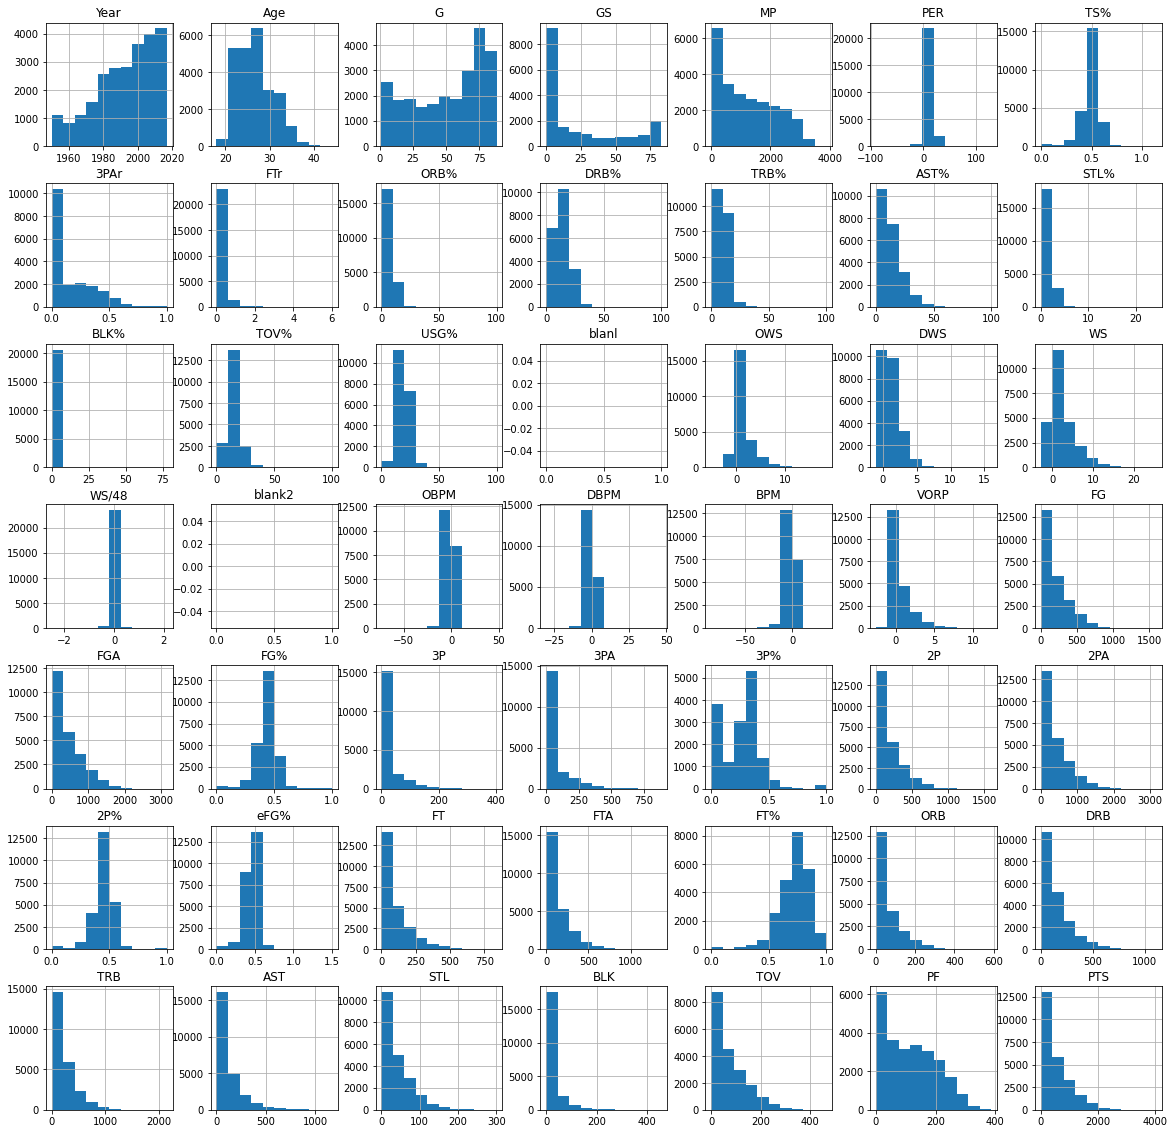

In [41]:
nba_stats_simplified.hist(figsize=(20,20));

<AxesSubplot:>

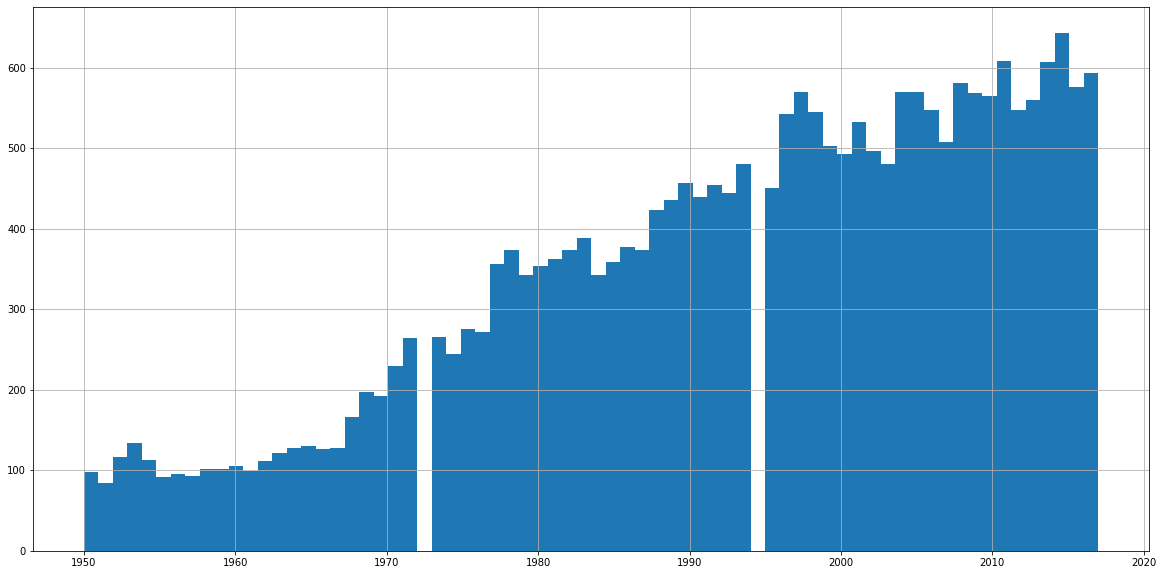

In [76]:
nba_stats_simplified.Year.hist(bins=70, figsize=(20,10));

In [92]:
nba_stats_simplified.Year.value_counts().sort_index()
nba_stats_simplified.Year.value_counts().sort_values()

1951.0     83
1955.0     89
1957.0     93
1956.0     96
1950.0     98
         ... 
2008.0    581
2017.0    594
2014.0    607
2011.0    608
2015.0    643
Name: Year, Length: 68, dtype: int64

In [123]:
nba_stats_simplified = nba_stats_simplified.reset_index(drop=True)

In [124]:
nba_stats_simplified

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
1,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
2,1950.0,Nelson Bobb,PG,25.0,PHW,57.0,NaN,NaN,NaN,0.396,NaN,0.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.3,1.8,NaN,NaN,NaN,NaN,NaN,80.0,248.0,0.323,NaN,NaN,NaN,80.0,248.0,0.323,0.323,82.0,131.0,0.626,NaN,NaN,NaN,46.0,NaN,NaN,NaN,97.0,242.0
3,1950.0,Vince Boryla,SF,22.0,NYK,59.0,NaN,NaN,NaN,0.426,NaN,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,1.4,3.9,NaN,NaN,NaN,NaN,NaN,204.0,600.0,0.340,NaN,NaN,NaN,204.0,600.0,0.340,0.340,204.0,267.0,0.764,NaN,NaN,NaN,95.0,NaN,NaN,NaN,203.0,612.0
4,1950.0,Harry Boykoff,C,27.0,WAT,61.0,NaN,NaN,NaN,0.479,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,-0.7,5.3,NaN,NaN,NaN,NaN,NaN,288.0,698.0,0.413,NaN,NaN,NaN,288.0,698.0,0.413,0.413,203.0,262.0,0.775,NaN,NaN,NaN,149.0,NaN,NaN,NaN,229.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
23874,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,0.5,0.6,1.0,0.094,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
23875,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
23876,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [128]:
nba_stats_simplified = nba_stats_simplified.drop(["index", "level_0"], axis=1, errors="ignore")
nba_stats_simplified.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
1,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
2,1950.0,Nelson Bobb,PG,25.0,PHW,57.0,NaN,NaN,NaN,0.396,NaN,0.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.3,1.8,NaN,NaN,NaN,NaN,NaN,80.0,248.0,0.323,NaN,NaN,NaN,80.0,248.0,0.323,0.323,82.0,131.0,0.626,NaN,NaN,NaN,46.0,NaN,NaN,NaN,97.0,242.0
3,1950.0,Vince Boryla,SF,22.0,NYK,59.0,NaN,NaN,NaN,0.426,NaN,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,1.4,3.9,NaN,NaN,NaN,NaN,NaN,204.0,600.0,0.340,NaN,NaN,NaN,204.0,600.0,0.340,0.340,204.0,267.0,0.764,NaN,NaN,NaN,95.0,NaN,NaN,NaN,203.0,612.0
4,1950.0,Harry Boykoff,C,27.0,WAT,61.0,NaN,NaN,NaN,0.479,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,-0.7,5.3,NaN,NaN,NaN,NaN,NaN,288.0,698.0,0.413,NaN,NaN,NaN,288.0,698.0,0.413,0.413,203.0,262.0,0.775,NaN,NaN,NaN,149.0,NaN,NaN,NaN,229.0,779.0


## Creating a test set

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

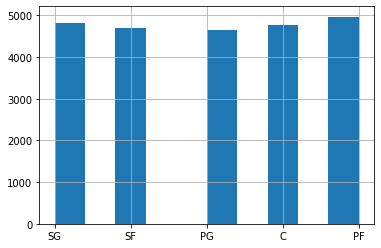

In [99]:
## Using stratified smapling by position to ensurte the same proportion of positions are present in the train and test data

nba_stats_simplified.Pos.hist();

In [100]:
train_set, test_set = train_test_split(nba_stats_simplified, test_size=.2, random_state=42)

In [101]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_i, test_i in split.split(nba_stats_simplified, nba_stats_simplified["Pos"]):
    strat_train_set = nba_stats_simplified.loc[train_i]
    strat_test_set = nba_stats_simplified.loc[test_i]

In [104]:
#checking that the correct proportion of data was stratified (Looks good!)
nba_stats_simplified['Pos'].value_counts()/len(nba_stats_simplified)

PF    0.207974
SG    0.201441
C     0.199179
SF    0.196792
PG    0.194614
Name: Pos, dtype: float64

In [105]:
train_test_set['Pos'].value_counts()/len(train_test_set)

PF    0.207915
SG    0.201424
C     0.199121
SF    0.196817
PG    0.194724
Name: Pos, dtype: float64

In [131]:
len(train_test_set.columns)

51

In [107]:
train_test_set.head(5)

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
4447,5019,1978.0,Bird Averitt,SG,25.0,NJN,21.0,NaN,409.0,8.2,0.419,NaN,0.239,1.6,6.5,3.9,23.0,1.8,0.1,20.9,23.7,-0.8,0.3,-0.5,-0.059,-4.6,-2.3,-6.9,-0.5,69.0,188.0,0.367,NaN,NaN,NaN,69.0,188.0,0.367,0.367,36.0,45.0,0.800,7.0,26.0,33.0,68.0,17.0,1.0,55.0,37.0,174.0
21805,22600,2014.0,DeAndre Liggins,SG,25.0,MIA,1.0,0.0,1.0,129.1,1.000,0.000,0.000,100.0,0.0,62.8,0.0,0.0,0.0,0.0,47.8,0.0,0.0,0.0,2.123,47.8,-23.1,24.8,0.0,1.0,1.0,1.000,0.0,0.0,NaN,1.0,1.0,1.000,1.000,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
18134,18850,2008.0,Brian Cook,PF,27.0,TOT,51.0,2.0,629.0,8.6,0.489,0.491,0.090,5.3,14.2,10.0,6.8,1.1,1.4,13.8,20.5,-0.4,0.7,0.4,0.029,-2.6,-1.1,-3.7,-0.3,88.0,234.0,0.376,43.0,115.0,0.374,45.0,119.0,0.378,0.468,19.0,21.0,0.905,28.0,81.0,109.0,27.0,13.0,12.0,39.0,93.0,238.0
14179,14823,2000.0,Andrae Patterson,PF,24.0,MIN,5.0,0.0,20.0,11.7,0.750,0.000,0.000,5.8,5.9,5.8,7.6,2.6,0.0,20.0,11.3,0.0,0.0,0.1,0.124,0.2,-0.6,-0.4,0.0,3.0,4.0,0.750,0.0,0.0,NaN,3.0,4.0,0.750,0.750,0.0,0.0,NaN,1.0,1.0,2.0,1.0,1.0,0.0,1.0,4.0,6.0
5855,6435,1981.0,Bob Wilkerson,SG,26.0,CHI,80.0,NaN,2238.0,12.3,0.507,0.014,0.228,4.6,9.6,7.2,16.7,2.2,0.6,18.2,17.5,1.2,2.0,3.2,0.068,-0.8,0.1,-0.7,0.7,330.0,715.0,0.462,1.0,10.0,0.100,329.0,705.0,0.467,0.462,137.0,163.0,0.840,86.0,196.0,282.0,272.0,102.0,23.0,175.0,170.0,798.0


In [132]:
for i_ in (strat_train_set, strat_test_set):
    i_.drop("WS", axis=1, inplace=True)

NameError: name 'strat_test_set' is not defined

In [133]:
player_data = strat_train_set.copy()

### Visualizing Training Data

In [ ]:
### These are all correlations ###
win shares vs the basic stats (assists, points, rebounds, steal, blocks)
correlation with minutes played


## Experimenting with attribute combinations